In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('train.csv',encoding='ISO-8859-1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [51]:
# Change ship date type to datetime object
df['Ship Date'] = pd.to_datetime(df['Ship Date'],  dayfirst=True)

In [57]:
# Fill missing values in postal code 
df['Postal Code'] = df['Postal Code'].fillna(0)
# Change postal code from float to int
df['Postal Code'] = df['Postal Code'].astype(int)

In [59]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date               object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int32
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [61]:
df.describe()

,Row ID,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-05 04:17:52.653061120,55211.280918,230.769059
min,1.000000,2015-01-07 00:00:00,0.000000,0.444000
25%,2450.750000,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-29 00:00:00,57551.000000,54.490000
75%,7350.250000,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,32076.677954,626.651875


In [71]:
if df.duplicated().sum()>0:
    print('Duplicates present')
    print(df.duplicated().sum())
else:
    print('No duplicates')

No duplicates


# Exploratory Data Analysis

## Customer

### Customer Segmentation

#### 1. Group customers based on segments(corporate, home office, consumer) and analyze their buying behavior to understand which segments contribute the most to overall sales.

In [90]:
cust = df.copy()
cust.Segment.value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [88]:
# Type of customers
customer_types = cust['Segment'].unique()
customer_types

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [108]:
# Number of customers in each segment
#cust_count = cust.groupby('Segment')['Customer ID'].count()
cust_count = cust['Segment'].value_counts().reset_index()
cust_count = cust_count.rename(columns = {'Segment':'Customer Type', 'count' : 'Total Customers'})
print(cust_count)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


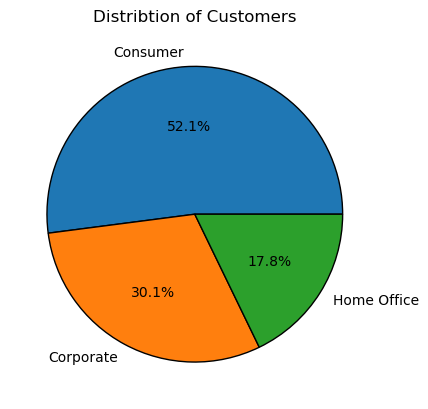

In [120]:
# Plot a pie chart
plt.pie(
    cust_count['Total Customers'], 
    labels = cust_count['Customer Type'],
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black'})
plt.title("Distribtion of Customers")
plt.show()

### Sales per customer segment

In [139]:
cust_sales = cust.groupby('Segment')['Sales'].sum().reset_index()
# Format numbers normally (e.g., 123456.78 instead of 1.23e+05)
pd.options.display.float_format = '{:,.2f}'.format
cust_sales = cust_sales.rename(columns = {'Segment': 'Customer Segment', 'Sales' : 'Total Sales'})
cust_sales

,Customer Segment,Total Sales
0,Consumer,"1,148,060.53"
1,Corporate,"688,494.07"
2,Home Office,"424,982.18"


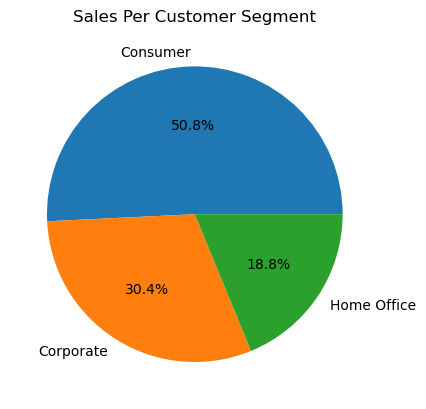

In [143]:
plt.pie(
    cust_sales['Total Sales'], 
    labels = cust_sales['Customer Segment'],
    autopct='%1.1f%%'
)
plt.title("Sales Per Customer Segment")
plt.show()

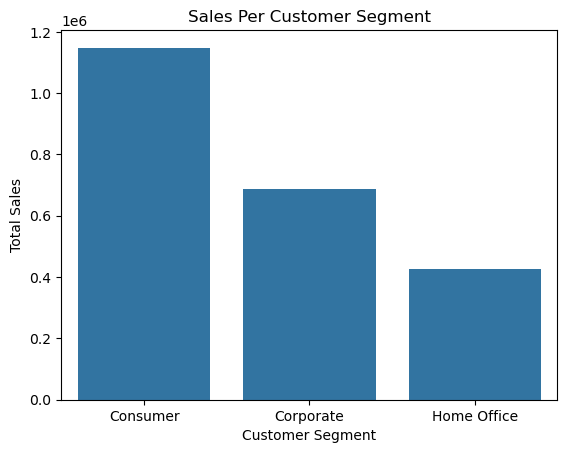

In [147]:
# Bar graph
sns.barplot(x=cust_sales['Customer Segment'], y = cust_sales['Total Sales'])
plt.title("Sales Per Customer Segment")
plt.show()

In [149]:
cust.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


## How many unique customers are there?

In [154]:
unique_customers = cust['Customer ID'].nunique()
print(f'Number of unique customers = {unique_customers}')

Number of unique customers = 793


## Who are the top 10 customers by total spend?

In [163]:
top_customers_by_spend = cust.groupby('Customer ID')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers_by_spend

Customer ID
SM-20320   25,043.05
TC-20980   19,052.22
RB-19360   15,117.34
TA-21385   14,595.62
AB-10105   14,473.57
KL-16645   14,175.23
SC-20095   14,142.33
HL-15040   12,873.30
SE-20110   12,209.44
CC-12370   12,129.07
Name: Sales, dtype: float64

## What % of customers are repeat buyers?

In [174]:
repeat_buyers = cust.groupby('Customer ID')['Order ID'].count().loc[lambda x: x>1].sort_values()
repeat_buyers

Customer ID
EL-13735     2
NB-18580     2
MG-18205     2
AR-10570     2
TS-21085     2
            ..
CK-12205    32
JL-15835    33
PP-18955    34
MA-17560    34
WB-21850    35
Name: Order ID, Length: 787, dtype: int64

## What is the average number of orders per customer?

In [185]:
avg_orders_customer = cust.groupby('Customer ID')['Order ID'].nunique().mean()
avg_orders_customer

6.206809583858764

## dentify loyal customers (frequency > 3 & avg days < 30)